In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
import seaborn as sns

Consider the system 

\begin{align}
x_{k+1} = x_k + \Delta t. v_k
\end{align}

\begin{align}
v_{k+1} = v_k + \Delta t.\frac{m.\sin(\theta_k).(l {\omega_k}^2 - g.\cos(\theta_k))}{M + m.\sin^2 (\theta_k)} + \Delta t.\frac{u_k}{M + m.\sin^2 (\theta_k)} 
\end{align}

\begin{align}
\theta_{k+1} = \theta_k + \Delta t. \omega_k 
\end{align}

\begin{align}
\omega_{k+1} = \omega_k + \Delta t.\frac{-m.l {\omega_k}^2.\sin(\theta_k).\cos(\theta_k) + (M + m)g.\sin(\theta_k)}{l(M + m.\sin^2 (\theta_k))} - \Delta t.\frac{u_k.\cos(\theta_k)}{l(M + m.\sin^2 (\theta_k))} 
\end{align}


Approximate Model is given by:

\begin{align}
\hat{x}_{k+1} = x_k + \Delta t. v_k
\end{align}

\begin{align}
\hat{v}_{k+1} = v_k - \Delta t.\frac{m.g}{M}\theta_k + \Delta t.\frac{u_k}{M} 
\end{align}

\begin{align}
\hat{\theta}_{k+1} = \theta_k + \Delta t. \omega_k 
\end{align}

\begin{align}
\hat{\omega}_{k+1} = \omega_k + \Delta t.\frac{(M+m).g}{Ml}\theta_k - \Delta t.\frac{u_k}{Ml} 
\end{align}

Model error is given by:

\begin{align}
d_{1,k} = x_{k+1} - \hat{x}_{k+1} + \mathcal{N}(0, σ^2)
\end{align}

\begin{align}
d_{2,k} = v_{k+1} - \hat{v}_{k+1} + \mathcal{N}(0, σ^2)
\end{align}

\begin{align}
d_{3,k} = \theta_{k+1} - \hat{\theta}_{k+1} + \mathcal{N}(0, σ^2)
\end{align}

\begin{align}
d_{4,k} = \omega_{k+1} - \hat{\omega}_{k+1} + \mathcal{N}(0, σ^2)
\end{align}

In [155]:
 import numpy as np
 import matplotlib.pyplot as plt

In [156]:
def true_model(x, v, theta, omega, u):
    g = 9.8     # Acceleration due to gravity
    l = 1       # Length of Pendulum
    m = 1       # Mass of Pendulum
    M = 10       # Mass of Cart
    dt = 0.01
    return x+dt*v, v + dt*(u + m*np.sin(theta)*(l*omega*omega - g*np.cos(theta)))/(M + m*(np.sin(theta))*(np.sin(theta))), theta + omega*dt, omega + dt*(-u*np.cos(theta) - m*l*omega*omega*(np.sin(theta))*(np.cos(theta)) + (M+m)*g*np.sin(theta))/(l*(M + m*(np.sin(theta))*(np.sin(theta))))
    

def approx_model(x, v, theta, omega, u):
    g = 9.8     # Acceleration due to gravity
    l = 1       # Length of Pendulum
    m = 1       # Mass of Pendulum
    M = 10       # Mass of Cart
    dt = 0.01
    return x+dt*v, v + dt*(u - m*theta*g)/M, theta + omega*dt, omega + dt*((M+m)*g*theta - u)/(M*l)

In [157]:
def training_data(N=1000, sigma= 0.1, a = 0.01):
    x0 = 0
    v0 = 0
    theta0 = 0.1
    omega0 = 0
    
    x_true = [x0]
    v_true = [v0]
    theta_true = [theta0]
    omega_true = [omega0]
    
    x_model = [x0]
    v_model = [v0]
    theta_model = [theta0]
    omega_model = [omega0]
    
    D1 = []
    D2 = []
    D3 = []
    D4 = []
    
    for i in range(N):
        
        dt = 0.01
        u = a*np.sin(i*dt)
        x_t, v_t, theta_t, omega_t = true_model(x0, v0, theta0, omega0, u)
        x_hat, v_hat, theta_hat, omega_hat = approx_model(x0, v0, theta0, omega0, u)
        
        d1 = x_t - x_hat + np.random.normal(0, sigma)
        d2 = v_t - v_hat + np.random.normal(0, sigma)
        d3 = theta_t - theta_hat + np.random.normal(0, sigma)
        d4 = omega_t - omega_hat + np.random.normal(0, sigma)
        
        x_true.append(x_t)
        v_true.append(v_t)
        theta_true.append(theta_t)
        omega_true.append(x_t)
        
        x_model.append(x_hat)
        v_model.append(v_hat)
        theta_model.append(theta_t)
        omega_model.append(omega_t)
        
        D1.append(d1)
        D2.append(d2)
        D3.append(d3)
        D4.append(d4)
        
        x0 = x_t
        v0 = v_t
        theta0 = theta_t
        omega0 = omega_t
        
    return x_true, v_true, theta_true, omega_true, x_model, v_model, theta_model, omega_model, D1, D2, D3, D4 

In [158]:
T1, T2, T3, T4, M1, M2, M3, M4, D1, D2, D3, D4  = training_data()

T1 = np.array(T1)
T2 = np.array(T2)
T3 = np.array(T3)
T4 = np.array(T4)

M1 = np.array(M1)
M2 = np.array(M2)
M3 = np.array(M3)
M4 = np.array(M4)

D1 = np.array(D1)
D2 = np.array(D2)
D3 = np.array(D3)
D4 = np.array(D4)


Text(0.5, 1.0, 'omega-error vs t')

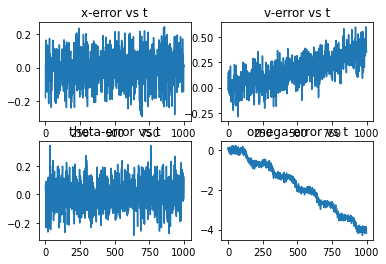

In [159]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(D1)
axs[0, 0].set_title('x-error vs t')

axs[0, 1].plot(D2)
axs[0, 1].set_title('v-error vs t')

axs[1, 0].plot(D3)
axs[1, 0].set_title('theta-error vs t')

axs[1, 1].plot(D4)
axs[1, 1].set_title('omega-error vs t')

#plt.plot(D2, label = "v error")
#plt.plot(D3, label = "theta error")
#plt.plot(D4, label = "omega error")
#plt.title("Model error vs t")
#plt.legend()

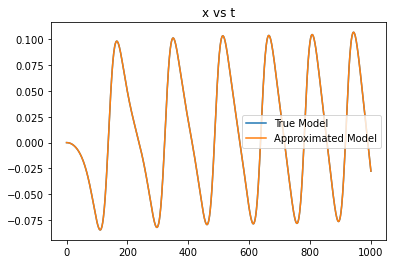

In [160]:
plt.plot(T1, label = "True Model")
plt.plot(M1, label = "Approximated Model")
plt.title("x vs t")
plt.legend()

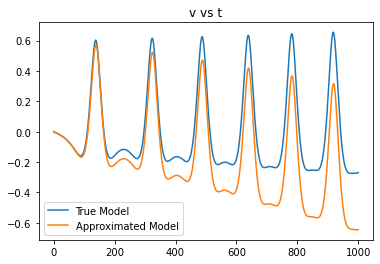

In [161]:
plt.plot(T2, label = "True Model")
plt.plot(M2, label = "Approximated Model")
plt.title("v vs t")
plt.legend()

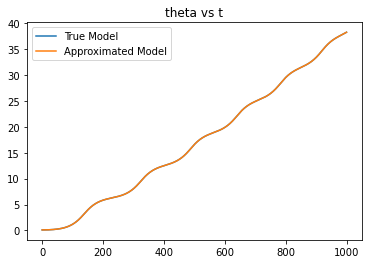

In [162]:
plt.plot(T3, label = "True Model")
plt.plot(M3, label = "Approximated Model")
plt.title("theta vs t")
plt.legend()

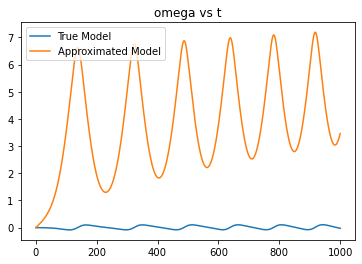

In [163]:
plt.plot(T4, label = "True Model")
plt.plot(M4, label = "Approximated Model")
plt.title("omega vs t")
plt.legend()

In [164]:
D1.shape, M1.shape, T1.shape, D2.shape, M2.shape, T2.shape, D3.shape, M3.shape, T3.shape, D4.shape, M4.shape, T4.shape 

((1000,),
 (1001,),
 (1001,),
 (1000,),
 (1001,),
 (1001,),
 (1000,),
 (1001,),
 (1001,),
 (1000,),
 (1001,),
 (1001,))

In [165]:
X = np.hstack((M1[:-1].reshape((-1,1)),M2[:-1].reshape((-1,1)), M3[:-1].reshape((-1,1)), M4[:-1].reshape((-1,1)))) 
y1 = D1
y2 = D2
y3 = D3
y4 = D4
X.shape

(1000, 4)

In [166]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic, ExpSineSquared
from sklearn.gaussian_process.kernels import RBF

# X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
print(X.shape, y1.shape)
#kernel = ExpSineSquared(length_scale=1, periodicity=100) + DotProduct() + WhiteKernel() + RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) + RBF(length_scale=.5, length_scale_bounds=(1e-2, 1e2)) + RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + RBF(length_scale=3.0, length_scale_bounds=(1e-2, 1e2)) + RationalQuadratic(length_scale=1.0, alpha=1.5)
kernel = ExpSineSquared(length_scale=10, periodicity=10) + DotProduct() + WhiteKernel() + RationalQuadratic(length_scale=1.0, alpha=2) 
gpr1 = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X, y1)
gpr1.score(X, y1)

mean, std = gpr1.predict(X[:2,:], return_std=True)

# X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
print(X.shape, y2.shape)
kernel = ExpSineSquared(length_scale=10, periodicity=10) + DotProduct() + WhiteKernel() + RationalQuadratic(length_scale=1.0, alpha=2)
gpr2 = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X, y2)
gpr2.score(X, y2)

mean, std = gpr2.predict(X[:2,:], return_std=True)

# X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
print(X.shape, y3.shape)
kernel = ExpSineSquared(length_scale=10, periodicity=10) + DotProduct() + WhiteKernel() + RationalQuadratic(length_scale=1.0, alpha=2)
gpr3 = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X, y3)
gpr3.score(X, y3)

mean, std = gpr3.predict(X[:2,:], return_std=True)

# X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
print(X.shape, y4.shape)
kernel = ExpSineSquared(length_scale=100, periodicity=10) + DotProduct() + WhiteKernel() + RationalQuadratic(length_scale=1.0, alpha=3)
gpr4 = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X, y4)
gpr4.score(X, y4)

mean, std = gpr4.predict(X[:2,:], return_std=True)

(1000, 4) (1000,)
(1000, 4) (1000,)
(1000, 4) (1000,)
(1000, 4) (1000,)


C:\Users\ssathe\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [167]:
D1hat, D1std = gpr1.predict(X, return_std=True)
D2hat, D2std = gpr2.predict(X, return_std=True)
D3hat, D3std = gpr3.predict(X, return_std=True)
D4hat, D4std = gpr4.predict(X, return_std=True)

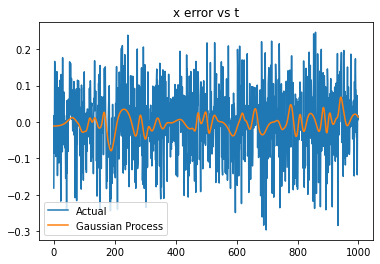

In [168]:
N_ploints = 1000

plt.plot(y1[:N_ploints], label = "Actual")
plt.plot(D1hat[:N_ploints], label = "Gaussian Process")
plt.title("x error vs t")
plt.legend()

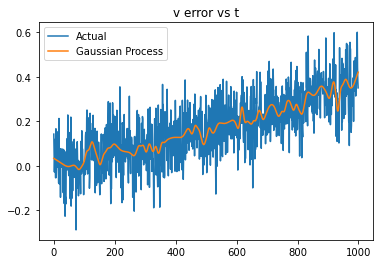

In [169]:
N_ploints = 1000

plt.plot(y2[:N_ploints], label = "Actual")
plt.plot(D2hat[:N_ploints], label = "Gaussian Process")
plt.title("v error vs t")
plt.legend()

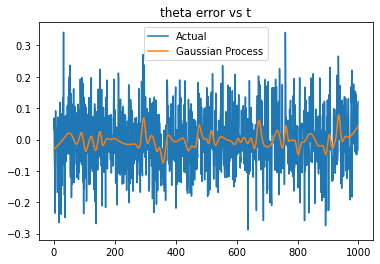

In [170]:
N_ploints = 1000

plt.plot(y3[:N_ploints], label = "Actual")
plt.plot(D3hat[:N_ploints], label = "Gaussian Process")
plt.title("theta error vs t")
plt.legend()

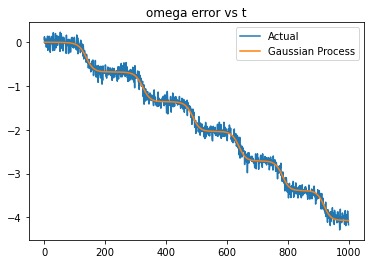

In [171]:
N_ploints = 1000

plt.plot(y4[:N_ploints], label = "Actual")
plt.plot(D4hat[:N_ploints], label = "Gaussian Process")
plt.title("omega error vs t")
plt.legend()

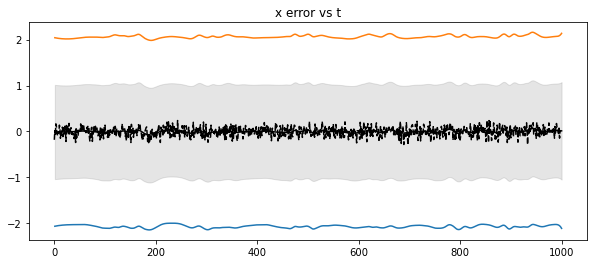

In [172]:
N_ploints = 1000
time = np.linspace(1, N_ploints, N_ploints)
fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(10, 4))
plt.plot(time, D1hat[:N_ploints] - 2*D1std[:N_ploints])
plt.plot(time, D1hat[:N_ploints], color="black")
plt.plot(time, D1hat[:N_ploints] + 2*D1std[:N_ploints])
plt.plot(y1[:N_ploints], color='black', linestyle = '--' )
plt.title("x error vs t")
plt.fill_between(time, D1hat[:N_ploints] - D1std[:N_ploints], D1hat[:N_ploints] + D1std[:N_ploints], alpha=0.1,color="black",label=r"$\pm$ 1 std. dev."    )

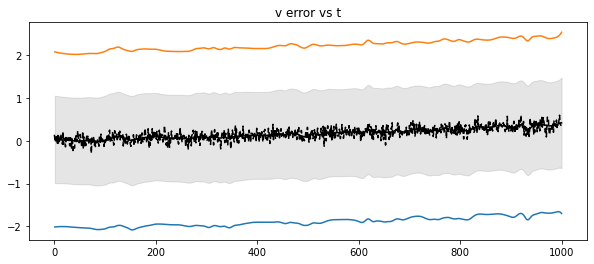

In [173]:
N_ploints = 1000
time = np.linspace(1, N_ploints, N_ploints)
fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(10, 4))
plt.plot(time, D2hat[:N_ploints] - 2*D2std[:N_ploints])
plt.plot(time, D2hat[:N_ploints], color="black")
plt.plot(time, D2hat[:N_ploints] + 2*D2std[:N_ploints])
plt.plot(y2[:N_ploints], color='black', linestyle = '--' )
plt.title("v error vs t")
plt.fill_between(time, D2hat[:N_ploints] - D2std[:N_ploints], D2hat[:N_ploints] + D2std[:N_ploints], alpha=0.1,color="black",label=r"$\pm$ 1 std. dev."    )

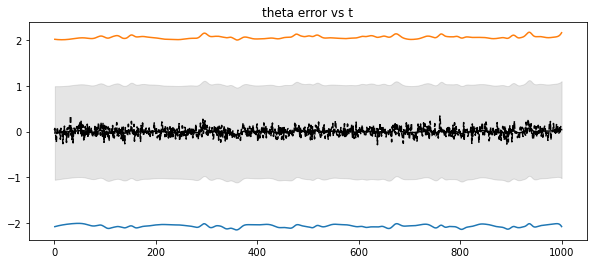

In [174]:
N_ploints = 1000
time = np.linspace(1, N_ploints, N_ploints)
fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(10, 4))
plt.plot(time, D3hat[:N_ploints] - 2*D3std[:N_ploints])
plt.plot(time, D3hat[:N_ploints], color="black")
plt.plot(time, D3hat[:N_ploints] + 2*D3std[:N_ploints])
plt.plot(y3[:N_ploints], color='black', linestyle = '--' )
plt.title("theta error vs t")
plt.fill_between(time, D3hat[:N_ploints] - D3std[:N_ploints], D3hat[:N_ploints] + D3std[:N_ploints], alpha=0.1,color="black",label=r"$\pm$ 1 std. dev."    )

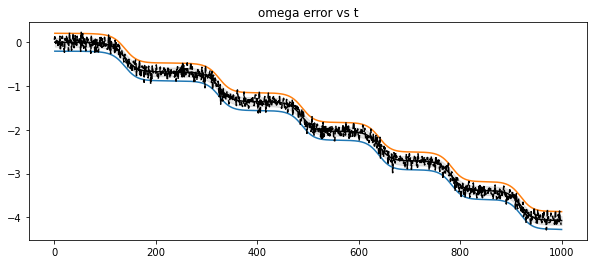

In [175]:
N_ploints = 1000
time = np.linspace(1, N_ploints, N_ploints)
fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(10, 4))
plt.plot(time, D4hat[:N_ploints] - 2*D4std[:N_ploints])
plt.plot(time, D4hat[:N_ploints], color="black")
plt.plot(time, D4hat[:N_ploints] + 2*D4std[:N_ploints])
plt.plot(y4[:N_ploints], color='black', linestyle = '--' )
plt.title("omega error vs t")
plt.fill_between(time, D4hat[:N_ploints] - D4std[:N_ploints], D4hat[:N_ploints] + D4std[:N_ploints], alpha=0.1,color="black",label=r"$\pm$ 1 std. dev."    )

In [176]:
def test_data(N=1000, sigma= 0.1, a = 0.01):
    x0 = 0
    v0 = 0
    theta0 = -0.1
    omega0 = 0
    
    x_true = [x0]
    v_true = [v0]
    theta_true = [theta0]
    omega_true = [omega0]
    
    x_model = [x0]
    v_model = [v0]
    theta_model = [theta0]
    omega_model = [omega0]
    
    D1 = []
    D2 = []
    D3 = []
    D4 = []
    
    for i in range(N):
        
        dt = 0.01
        u = a*np.cos(1.2*i*dt) + a*np.sin(i*dt)
        x_t, v_t, theta_t, omega_t = true_model(x0, v0, theta0, omega0, u)
        x_hat, v_hat, theta_hat, omega_hat = approx_model(x0, v0, theta0, omega0, u)
        
        d1 = x_t - x_hat + np.random.normal(0, sigma)
        d2 = v_t - v_hat + np.random.normal(0, sigma)
        d3 = theta_t - theta_hat + np.random.normal(0, sigma)
        d4 = omega_t - omega_hat + np.random.normal(0, sigma)
        
        x_true.append(x_t)
        v_true.append(v_t)
        theta_true.append(theta_t)
        omega_true.append(x_t)
        
        x_model.append(x_hat)
        v_model.append(v_hat)
        theta_model.append(theta_t)
        omega_model.append(omega_t)
        
        D1.append(d1)
        D2.append(d2)
        D3.append(d3)
        D4.append(d4)
        
        x0 = x_t
        v0 = v_t
        theta0 = theta_t
        omega0 = omega_t
        
    return x_true, v_true, theta_true, omega_true, x_model, v_model, theta_model, omega_model, D1, D2, D3, D4 

In [177]:
T1, T2, T3, T4, M1, M2, M3, M4, D1, D2, D3, D4  = test_data()

T1 = np.array(T1)
T2 = np.array(T2)
T3 = np.array(T3)
T4 = np.array(T4)

M1 = np.array(M1)
M2 = np.array(M2)
M3 = np.array(M3)
M4 = np.array(M4)

D1 = np.array(D1)
D2 = np.array(D2)
D3 = np.array(D3)
D4 = np.array(D4)

In [178]:
X = np.hstack((M1[:-1].reshape((-1,1)),M2[:-1].reshape((-1,1)), M3[:-1].reshape((-1,1)), M4[:-1].reshape((-1,1)))) 
D1hat, D1std = gpr1.predict(X, return_std=True)
D2hat, D2std = gpr2.predict(X, return_std=True)
D3hat, D3std = gpr3.predict(X, return_std=True)
D4hat, D4std = gpr4.predict(X, return_std=True)

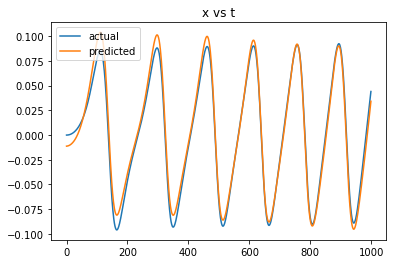

In [179]:
p = 1000
P1 = M1[:p] + D1hat[:p]
plt.plot(T1[:p], label = "actual")
plt.plot(P1[:p], label = "predicted")
plt.title('x vs t')
plt.legend()

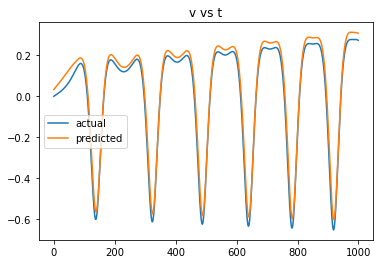

In [180]:
p = 1000
P2 = M2[:p] + D2hat[:p]
plt.plot(T2[:p], label = "actual")
plt.plot(P2[:p], label = "predicted")
plt.title('v vs t')
plt.legend()

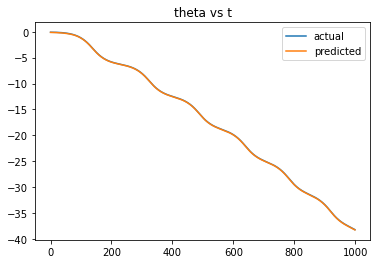

In [181]:
p = 1000
P3 = M3[:p] + D3hat[:p]
plt.plot(T3[:p], label = "actual")
plt.plot(P3[:p], label = "predicted")
plt.title('theta vs t')
plt.legend()

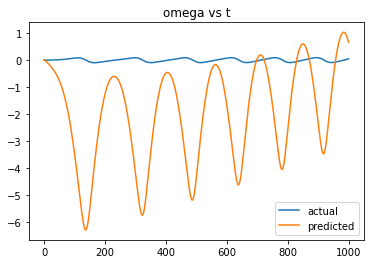

In [182]:
p = 1000
P4 = M4[:p] + D4hat[:p]
plt.plot(T4[:p], label = "actual")
plt.plot(P4[:p], label = "predicted")
plt.title('omega vs t')
plt.legend()